In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wave
import struct

pi = np.pi

f, duration, sampling_rate, no_of_bits = input('enter frequency: \nduration: \nsampling rate: \nno_of_bits: \n').split()

f = int(f)
duration = int(duration)
sampling_rate = int(sampling_rate)
no_of_bits = int(no_of_bits)


print(f, duration, sampling_rate, no_of_bits)

4 1 50 3


In [10]:
# sine wave:
# f(t) = Asin(2*pi*f*t)

# f = 4
# duration = 1
# sampling_rate = 50
# no_of_bits = 3
level = 1 / (2 ** (no_of_bits - 1))



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


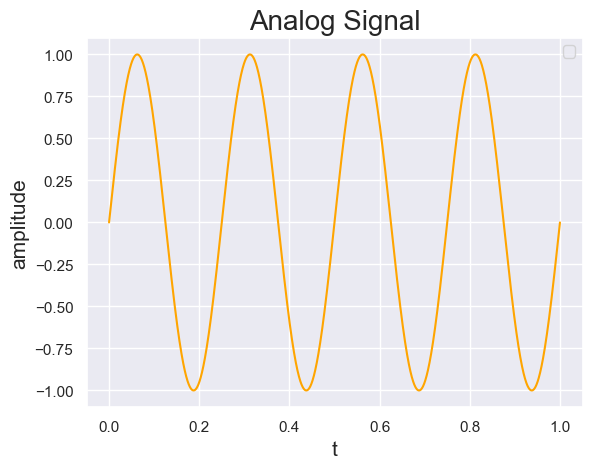

In [11]:
sns.set()
t  = np.linspace(0, duration, 2000)
f_t = np.sin(2*f*pi*t)
plt.plot(t, f_t, 'orange')
plt.title('Analog Signal', fontsize=20)
plt.xlabel('t' , fontsize=15)
plt.ylabel('amplitude', fontsize=15)
plt.legend(loc='upper right')

C:\Users\mohammad\AppData\Local\Temp\ipykernel_3852\1552045353.py:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, f_t, use_line_collection = False, basefmt='black', linefmt='C4')


Text(0, 0.5, 'amplitude')

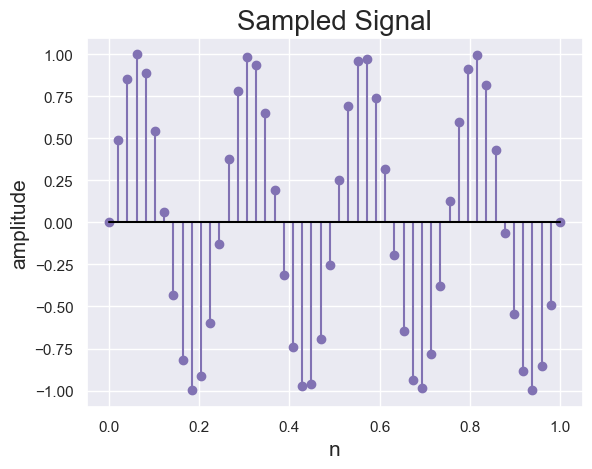

In [12]:

n  = np.linspace(0, duration, sampling_rate)
f_t = np.sin(2*f*pi*n)

plt.stem(n, f_t, use_line_collection = False, basefmt='black', linefmt='C4')
plt.title('Sampled Signal', fontsize=20)
plt.xlabel('n' , fontsize=15)
plt.ylabel('amplitude', fontsize=15)

Text(0, 0.5, 'amplitude')

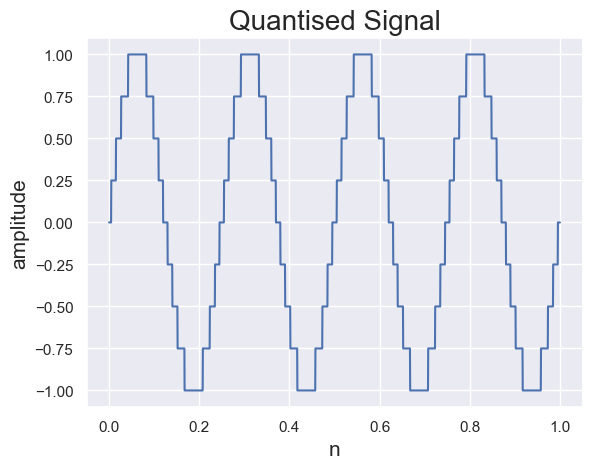

In [13]:
f_t = np.sin(2*f*pi*t)
quantised = level * np.round(f_t/level)
plt.plot(t, quantised)

plt.title('Quantised Signal', fontsize=20)
plt.xlabel('n' , fontsize=15)
plt.ylabel('amplitude', fontsize=15)


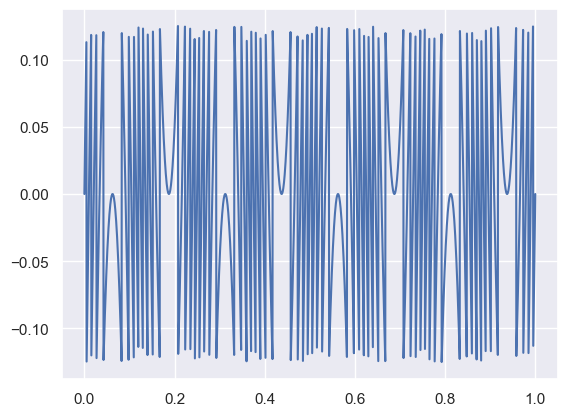

In [14]:
noise = f_t - quantised
plt.plot(t, noise)

In [15]:
print(f"SQNR = {6.02 * no_of_bits + 1.76} db")

SQNR = 19.82 db


In [16]:
num_samples = 48000
sampling_rate = 48000.0
amplitude = 16000

file = "wave.wav"
nframes = num_samples
comptype = "NONE"
compname = "not compressed"
nchannels = 1
sampwidth = 2

wav_file = wave.open(file, 'w')
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))


for sample in quantised:
    sample_value = int(sample * amplitude)
    frame = struct.pack('h', sample_value)
    wav_file.writeframes(frame)

wav_file.close()
